In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

nes_data_path = "Nestor Data/DataSet.csv"

nes_data = pd.read_csv(nes_data_path)

nes_data.head()



,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,trstplc,trstplt,trstprl,trstprt,trstun,imueclt,imwbcnt,trrcnyr,trrenyr,ctjbcnt
0,ESS1e06_7,1,6.7,23.11.2023,1,AT,0.9452,0.940933,0.271487,0.255451,...,10,0,9,NaN,9,9,7,NaN,NaN,NaN
1,ESS1e06_7,1,6.7,23.11.2023,2,AT,0.4726,0.470466,0.271487,0.127726,...,5,0,0,NaN,6,10,5,NaN,NaN,NaN
2,ESS1e06_7,1,6.7,23.11.2023,3,AT,0.9452,1.392155,0.271487,0.377953,...,8,2,6,NaN,88,5,5,NaN,NaN,NaN
3,ESS1e06_7,1,6.7,23.11.2023,4,AT,0.9452,1.382163,0.271487,0.375240,...,9,4,8,NaN,8,10,10,NaN,NaN,NaN
4,ESS1e06_7,1,6.7,23.11.2023,6,AT,1.8905,1.437766,0.271487,0.390336,...,4,4,6,NaN,5,88,88,NaN,NaN,NaN


In [82]:
first_vis_data = nes_data.loc[:,["essround", "idno", "trstlgl", "netuse", "lrscale","netustm","netusoft"]]
first_vis_data


,essround,idno,trstlgl,netuse,lrscale,netustm,netusoft
0,1,1,10,5.0,6,NaN,NaN
1,1,2,8,6.0,6,NaN,NaN
2,1,3,4,0.0,5,NaN,NaN
3,1,4,10,4.0,5,NaN,NaN
4,1,6,7,7.0,5,NaN,NaN
...,...,...,...,...,...,...,...
430865,9,69817,0,NaN,10,6666.0,1.0
430866,9,69844,4,NaN,9,6666.0,3.0
430867,9,69871,5,NaN,5,120.0,5.0
430868,9,69902,5,NaN,3,6666.0,1.0


In [83]:
first_vis_cleaned = first_vis_data.loc[:,
                                         ["essround", "idno", "trstlgl", "netuse", "lrscale"]]

first_vis_cleaned = first_vis_cleaned.dropna()

first_vis_cleaned = first_vis_cleaned.loc[(first_vis_cleaned["trstlgl"] <=10) & 
                                          (first_vis_cleaned["lrscale"] <=10) &
                                          (first_vis_cleaned["netuse"] <=7) & 
                                          (first_vis_cleaned["netuse"] > 0),
                                         ["essround", "idno", "trstlgl", "netuse", "lrscale"]]

first_vis_cleaned

,essround,idno,trstlgl,netuse,lrscale
0,1,1,10,5.0,6
1,1,2,8,6.0,6
3,1,4,10,4.0,5
4,1,6,7,7.0,5
7,1,10,7,6.0,6
...,...,...,...,...,...
242090,5,2981,5,1.0,8
242096,5,2990,0,1.0,3
242098,5,2993,6,1.0,6
242103,5,2998,0,1.0,5


In [84]:
first_vis_averages =[]

first_vis_averages = first_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean" ,
                                           "netuse":"mean" 
                                           })
first_vis_averages = first_vis_averages.reset_index()

first_vis_averages.head()




,lrscale,trstlgl,netuse
0,0,4.527433,4.504141
1,1,4.940908,4.674502
2,2,5.322315,5.132882
3,3,5.522925,5.197841
4,4,5.554555,5.173561


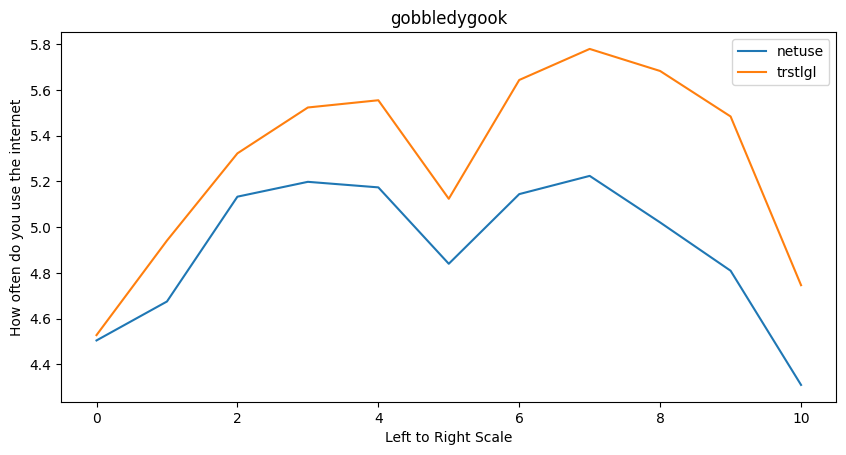

In [85]:
fig1, ax1 =plt.subplots()
ax1.plot("lrscale", "netuse",data = first_vis_averages)
ax1.set(xlabel = "Left to Right Scale", ylabel = "How often do you use the internet", title = "gobbledygook")
ax1.plot("lrscale", "trstlgl",data = first_vis_averages)
fig1.set_figwidth(10)

ax1.legend()


<Axes: xlabel='lrscale'>

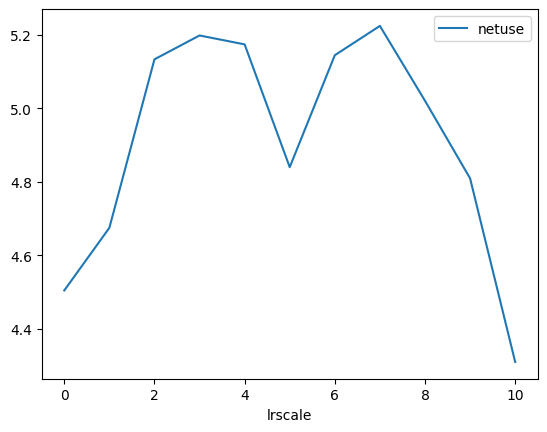

In [86]:
first_vis_averages.plot(kind="line", x = "lrscale", y = "netuse")

In [131]:
second_vis_data = nes_data.loc[:,["essround", "idno", "trstlgl", "lrscale","netustm", "netusoft"]]



second_vis_cleaned = second_vis_data.loc[:,
                                         ["essround", "idno", "trstlgl", "netustm", "lrscale"]]

second_vis_cleaned = second_vis_cleaned.dropna()

second_vis_cleaned = second_vis_cleaned.loc[(second_vis_cleaned["trstlgl"] <=10) & 
                                          (second_vis_cleaned["lrscale"] <=10) &
                                          (second_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "trstlgl", "netustm", "lrscale"]]


second_vis_averages =[]

second_vis_averages = second_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean" ,
                                           "netustm":"mean" 
                                           })
second_vis_averages = second_vis_averages.reset_index()

second_vis_averages



,lrscale,trstlgl,netustm
0,0,4.868666,205.131851
1,1,5.280367,200.453018
2,2,5.784946,208.914560
3,3,6.061132,203.965813
4,4,6.065199,201.835125
5,5,5.468059,196.101309
6,6,6.064140,198.754101
7,7,6.126133,204.624981
8,8,6.034392,198.497575
9,9,5.754491,193.467066


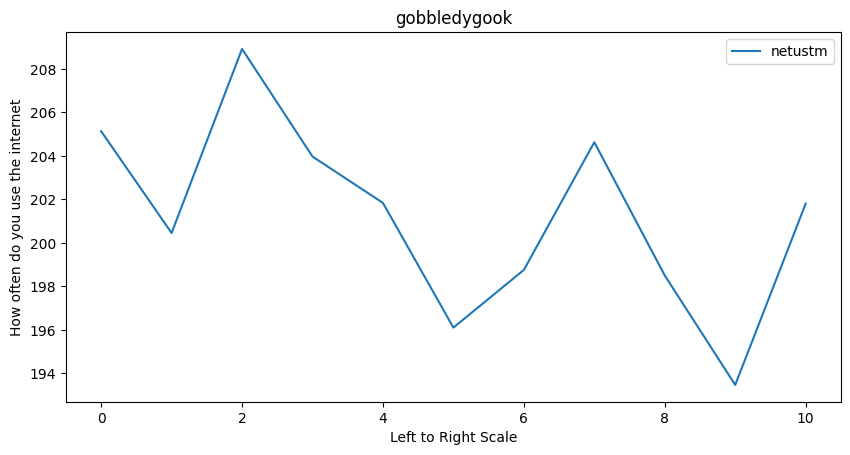

In [91]:
fig1, ax1 =plt.subplots()
ax1.plot("lrscale", "netustm",data = second_vis_averages)
ax1.set(xlabel = "Left to Right Scale", ylabel = "How often do you use the internet", title = "gobbledygook")
fig1.set_figwidth(10)

ax1.legend()

In [129]:
def LinRegressWPlot(x_values, y_values, x_label, y_label, position):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # format and save line equation for presentation on plot      
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # present plot
    plt.plot(x_values, y_values)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, position, fontsize = 15, color = "red")

    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: -0.5303272782317123


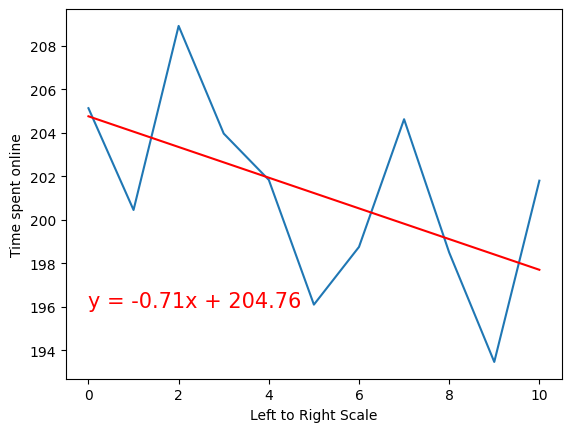

In [117]:
x_values = second_vis_averages["lrscale"]
y_values = second_vis_averages["netustm"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Left to Right Scale","Time spent online", (0,196))

In [118]:
second_vis_averages = second_vis_averages.sort_values("netustm")

second_vis_averages.head()


,lrscale,trstlgl,netustm
9,9,6.0,193.467066
5,5,6.0,196.101309
8,8,7.0,198.497575
6,6,6.0,198.754101
1,1,6.0,200.453018


The r-value is: 0.2577330016277506


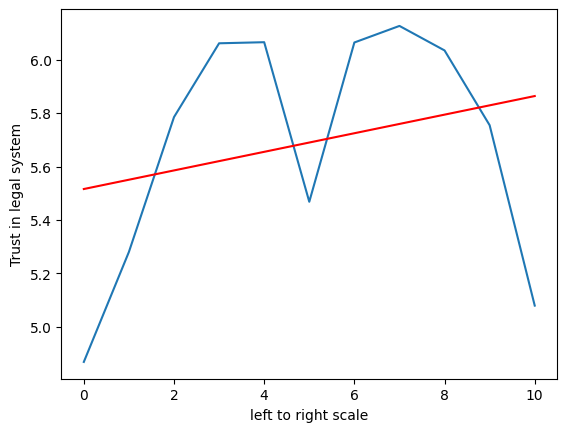

In [132]:
##############

x_values = second_vis_averages["lrscale"]
y_values = second_vis_averages["trstlgl"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"left to right scale","Trust in legal system", (194, 5.0))

In [136]:
third_vis_data = nes_data.loc[:,["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "lrscale","netustm"]]
third_vis_data


third_vis_cleaned = third_vis_data.loc[:,
                                         ["essround", "idno", "trstlgl", "netustm", "lrscale"]]

third_vis_cleaned = third_vis_cleaned.dropna()

third_vis_cleaned = third_vis_cleaned.loc[(third_vis_cleaned["trstlgl"] <=10) & 
                                            (third_vis_cleaned["trstplt"] <=10) &
                                            (third_vis_cleaned["trstplc"] <=10) &
                                            (third_vis_cleaned["trstprl"] <=10) &
                                            (third_vis_cleaned["trstplt"] <=10) &
                                            (third_vis_cleaned["lrscale"] <=10) &
                                          (third_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "lrscale","netustm"]]


third_vis_averages =[]

third_vis_averages = third_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "median" ,
                                            "trstplt": "median" ,
                                            "trstplc": "median" ,
                                            "trstprl": "median" ,
                                            "trstplt": "median" ,
                                           "netustm": "mean" 
                                           })
third_vis_averages = third_vis_averages.reset_index()

third_vis_averages


fig1, ax1 =plt.subplots()
ax1.plot("lrscale", "trstlgl",data = third_vis_averages)
ax1.set(xlabel = "Left to Right Scale", ylabel = "How often do you use the internet", title = "gobbledygook")
ax1.plot("lrscale", "trstplt",data = third_vis_averages)
ax1.plot("lrscale", "trstplc",data = third_vis_averages)
ax1.plot("lrscale", "trstprl",data = third_vis_averages)
ax1.plot("lrscale", "trstprt",data = third_vis_averages)
fig1.set_figwidth(10)

ax1.legend()



KeyError: 'trstplt'

In [ ]:
x_values = third_vis_averages["lrscale"]
y_values = third_vis_averages["netustm"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Left to Right Scale","Time spent online", (0,196))